In [13]:
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
import matplotlib.cm as cm  # Para usar una paleta de colores continua
from networkx.drawing.nx_agraph import graphviz_layout

def mostrar_grafo(G):
    plt.figure(figsize=(30,30))
    #pos = nx.spring_layout(G,k=1)
    #pos=nx.circular_layout(G)
    #pos=nx.shell_layout(G)
    #pos=nx.random_layout(G)
    #pos = graphviz_layout(G, prog='dot')
    #pos=nx.spectral_layout(G)
    #pos=nx.spiral_layout(G)
    
    pos = nx.spring_layout(G)
    #pos = nx.kamada_kawai_layout(G)
    
    # Obtener todos los valores de profundidad para ajustar el rango de colores
    profundidades = [G.nodes[node].get('profundidad', 0) for node in G.nodes]
    
    # Normalizar las profundidades para asignar colores continuos en una escala
    min_prof, max_prof = min(profundidades), max(profundidades)
    colors = [
        cm.viridis((prof - min_prof) / (max_prof - min_prof)) if max_prof > min_prof else cm.viridis(0.5)
        for prof in profundidades
    ]
    
    nx.draw(G,pos,with_labels=False, node_color=colors, edge_color="gray", node_size=2000, font_size=10)
    # Prepara las etiquetas con atributos de cada nodo
    labels = {node: f"n:{node}\np:{G.nodes[node].get('profundidad', '')}" for node in G.nodes}
    
    # Dibuja las etiquetas de los nodos con sus atributos
    nx.draw_networkx_labels(G, pos, labels, font_size=15, font_color="white")
    
    plt.margins(0.2)
    plt.show()

In [15]:
def dibujar_arbol(grafo, nodo_raiz=1):
    # Asegurarse de que el grafo sea dirigido
    if not nx.is_directed(grafo):
        raise ValueError("El grafo debe ser dirigido.")
    
    # Calcular la distancia desde el nodo raíz a todos los demás nodos
    distancias = nx.single_source_shortest_path_length(grafo, nodo_raiz)
    
    # Crear la estructura de posiciones de nodos
    pos = {nodo_raiz: (0, 0)}  # Posición inicial del nodo raíz en el centro
    nivel_offset = 1.5  # Espaciado inicial en el eje x para los hijos de cada nodo
    procesados = {nodo_raiz}  # Conjunto para marcar nodos ya procesados
    
    def asignar_posiciones(nodo, profundidad, offset_x):
        """ Función recursiva para asignar posiciones a los nodos """
        hijos = list(grafo.successors(nodo))
        num_hijos = len(hijos)
        
        if num_hijos == 0:
            return  # Si no tiene hijos, termina la recursión
        
        # Calcular el espaciado para los hijos basado en el nivel de profundidad
        espacio_hijos = offset_x / max(1, num_hijos - 1)  # Reduce el offset en cada nivel
        
        for i, hijo in enumerate(hijos):
            # Asigna posición al hijo basado en su índice
            pos[hijo] = (
                pos[nodo][0] + (i - (num_hijos - 1) / 2) * espacio_hijos,  # x
                pos[nodo][1] - 0.5  # y, bajamos en el eje vertical para el nivel
            )
            procesados.add(hijo)
            # Llamada recursiva para colocar los descendientes del hijo
            asignar_posiciones(hijo, profundidad + 1, offset_x / 2)
    
    # Iniciar la colocación de nodos desde la raíz
    asignar_posiciones(nodo_raiz, 0, nivel_offset * len(distancias))
    
    # Dibujar el grafo usando las posiciones calculadas
    plt.figure(figsize=(10, 10,))
    nx.draw(grafo, pos=pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
    
    # Mostrar el gráfico
    plt.title(f'Árbol generado a partir del grafo dirigido (Raíz: Nodo {nodo_raiz})')
    plt.show()


In [16]:
import random

def formar_particion_estado(n):
    lista_hojas = []
        
    G = nx.DiGraph()
    G.add_node(1, profundidad = 0)
    G.graph['altura'] = 0
    
    lista_hojas.append(1)
    nodos=1
    
    for i in range(1,n+1):
        selec = random.choice(lista_hojas)
        #print("Nodo seleccionado: "+str(selec))
        profundidad = nx.shortest_path_length(G, source=1,target=selec)+1
        
        if profundidad > G.graph['altura']:
            G.graph['altura'] = profundidad
            
        G.add_node(nodos+1,profundidad=profundidad)
        G.add_node(nodos+2,profundidad=profundidad)
        G.add_edges_from([(selec,nodos+1),(selec,nodos+2)])
        #print("Añadidos hijos "+str(nodos+1)+" y "+str(nodos+2))
        lista_hojas.append(nodos+1)
        lista_hojas.append(nodos+2)
        lista_hojas.remove(selec)
        nodos+=2
    
    return G

In [17]:
import random

def formar_particion_estado_4(n):
    lista_hojas = []
        
    G = nx.DiGraph()
    G.add_node(1, profundidad=0)
    G.graph['altura'] = 0
    
    lista_hojas.append(1)
    nodos=1
    
    for i in range(1,n+1):
        selec = random.choice(lista_hojas)
        #print("Nodo seleccionado: "+str(selec))
        profundidad = nx.shortest_path_length(G, source=1,target=selec)+1
        
        if profundidad > G.graph['altura']:
            G.graph['altura'] = profundidad
        
        G.add_node(nodos+1,profundidad=profundidad)
        G.add_node(nodos+2,profundidad=profundidad)
        G.add_node(nodos+3,profundidad=profundidad)
        G.add_node(nodos+4,profundidad=profundidad)
        G.add_edges_from([(selec,nodos+1),(selec,nodos+2),(selec,nodos+3),(selec,nodos+4)])
        #print("Añadidos hijos "+str(nodos+1)+" y "+str(nodos+2))
        lista_hojas.append(nodos+1)
        lista_hojas.append(nodos+2)
        lista_hojas.append(nodos+3)
        lista_hojas.append(nodos+4)
        lista_hojas.remove(selec)
        nodos+=4
    
    return G

In [18]:
def describir_arbol(G):
    nodes = list(G.nodes)
    string = describir_arbol_aux(nodes[0],G,0)
    print(string)
    
def describir_arbol_aux(nodo, G, profundidad):
    hijos = list(G.successors(nodo))
    resultado = "\t"*profundidad+f"Nodo: {nodo} | Profundidad: {G.nodes[nodo]['profundidad']}\n"
    if hijos != []:
        for hijo in hijos:
            resultado+=describir_arbol_aux(hijo,G,profundidad+1)
    return resultado

In [19]:
G=(formar_particion_estado_4(4))
describir_arbol(G)

Nodo: 1 | Profundidad: 0
	Nodo: 2 | Profundidad: 1
	Nodo: 3 | Profundidad: 1
	Nodo: 4 | Profundidad: 1
	Nodo: 5 | Profundidad: 1
		Nodo: 6 | Profundidad: 2
		Nodo: 7 | Profundidad: 2
		Nodo: 8 | Profundidad: 2
			Nodo: 10 | Profundidad: 3
			Nodo: 11 | Profundidad: 3
			Nodo: 12 | Profundidad: 3
			Nodo: 13 | Profundidad: 3
		Nodo: 9 | Profundidad: 2
			Nodo: 14 | Profundidad: 3
			Nodo: 15 | Profundidad: 3
			Nodo: 16 | Profundidad: 3
			Nodo: 17 | Profundidad: 3


In [20]:
G.graph['altura']

3

In [21]:
def mostrar_cuadrado(cuadrado):
    x, y = cuadrado.centro  # Centro del cuadrado
    size = cuadrado.tamaño  # Tamaño del lado del cuadrado (puedes ajustar esto)

    fig, ax = plt.subplots()
    # Dibujar el cuadrado centrado en (x, y)
    ax.add_patch(plt.Rectangle((x - size / 2, y - size / 2), size, size, fill=True, color='blue'))

    # Ajustar los límites para que muestren solo el cuadrado
    ax.set_xlim(x - size, x + size)
    ax.set_ylim(y - size, y + size)

    ax.set_aspect('equal')
    # Ocultar ejes y bordes
    ax.axis('off')

    # Mostrar solo el cuadrado
    plt.show()

In [30]:
import matplotlib.patches as patches

class Cuadrado():
    def __init__(self, G, nodo=1, centro=(0, 0), tamaño=10):
        tipos = ["suelo", "pared", "pared"]
        self.nodo = nodo
        self.centro = centro
        self.tamaño = tamaño
        self.tipo = random.choice(tipos)

        self.profundidad = G.graph['altura']

        self.cuadrantes = []

        self.hijos = []

        hijos = list(G.successors(nodo))

        if hijos:
            # Se divide por cuatro porque tiene la mitad de tamaño, y después se divide a la mitad otra vez para determinar el centro.
            mitad_tamaño = self.tamaño / 2
            centro_cuadrante = mitad_tamaño / 2
            offsets = [
                (-centro_cuadrante, centro_cuadrante),  # Cuadrante arriba izquierda
                (centro_cuadrante, centro_cuadrante),  # Cuadrante arriba derecha
                (-centro_cuadrante, -centro_cuadrante),  # Cuadrante abajo izquierda
                (centro_cuadrante, -centro_cuadrante)  # Cuadrante abajo derecha
            ]

            for hijo, offset in zip(hijos, offsets):
                nuevo_centro = (self.centro[0] + offset[0], self.centro[1] + offset[1])
                self.cuadrantes.append(Cuadrado(G, hijo, nuevo_centro, mitad_tamaño))

    def __str__(self):
        """
        Representación en texto del cuadrado.
        """
        return f"Cuadrado(nodo={self.nodo},tamaño={self.tamaño},tipo={self.tipo})"

    def imprimir_estructura(self, nivel=0):
        """
        Imprime la estructura jerárquica del cuadrado.
        """
        print(" " * nivel * 4 + str(self))
        for cuadrante in self.cuadrantes:
            cuadrante.imprimir_estructura(nivel + 1)

    def dibujar(self, ax):
        # Dibuja el cuadrado actual
        x, y = self.centro
        tamaño = self.tamaño
        if self.tipo == 'pared':
            rect = patches.Rectangle(
                (x - tamaño / 2, y - tamaño / 2), tamaño, tamaño,
                linewidth=1, edgecolor='blue', facecolor='black'
            )
            ax.add_patch(rect)
        elif self.tipo == 'suelo':
            rect = patches.Rectangle(
                (x - tamaño / 2, y - tamaño / 2), tamaño, tamaño,
                linewidth=1, edgecolor='blue', facecolor='white'
            )
            ax.add_patch(rect)

        # Dibujar los hijos
        for cuadrante in self.cuadrantes:
            cuadrante.dibujar(ax)

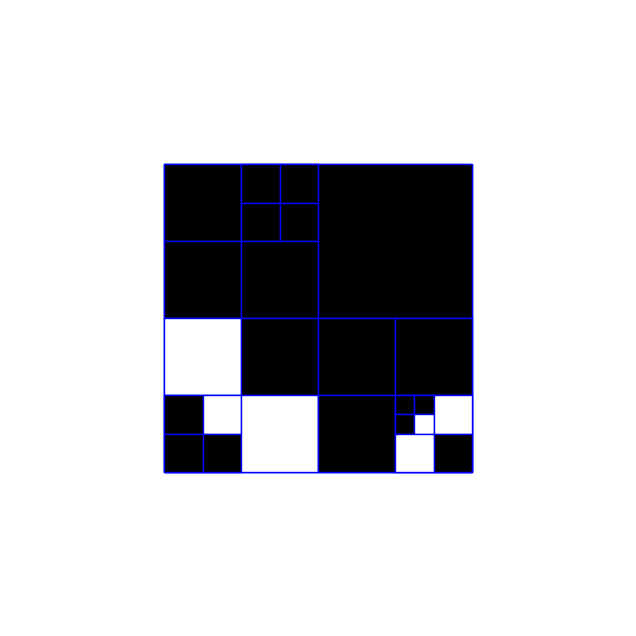

In [56]:
G = formar_particion_estado_4(8)
cuadrado = Cuadrado(G)
#cuadrado.imprimir_estructura()
#print(cuadrado.profundidad)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
ax.axis('off')

# Configuración del fondo transparente
fig.patch.set_alpha(0)  # Fondo de la figura transparente
ax.patch.set_alpha(0)   # Fondo del eje transparente

cuadrado.dibujar(ax)

plt.show()